In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# import the xlsx file
data = pd.read_excel("DAGs Data New.xlsx")

In [2]:
years = list(set(data["Year"]))
for year in years:
    data[year] = 0
    data[year][data["Year"] == year] = 1

<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[year][data["Year"] == year] = 1
<ipython-input-2-a867f14c8da9>:4: SettingWithCopyWarning: 
A value is trying to be set o

In [3]:
# set view options to show entire dataframe
pd.set_option("max_rows", len(data.index))
pd.set_option("max_columns", len(data.columns))

In [4]:
list(data.keys())

['Unnamed: 0',
 'Article_title',
 'Article_link',
 'General_outcome',
 'General_outcome (1,0)',
 'Desc_general_outcome',
 'Daily_intake',
 'Descr_daily_intake',
 'Health_outcome',
 'Descr_health_outcome',
 'Environmental_outcome',
 'Descr_environmental_outcome',
 'Fund_source1',
 'Fund_Source',
 'University',
 'Private',
 'Private & Public',
 'Private & University',
 'Public',
 'Public & International Org',
 'Public & University',
 'University & International Org',
 'International Org',
 'Research Institution',
 'Not Available',
 'Private Affiliation',
 'Public Affiliation',
 'University Affiliation',
 'Institution',
 'Author_affiliation',
 'Loc_authors',
 'Loc_experiment',
 'Herbicide Use',
 'Herbicide Use/Year',
 'North America',
 'South America',
 'Europe',
 'Asia',
 'Others',
 'Continent',
 'YearP',
 'Year',
 'Journal',
 'Loc_journal',
 'Loc_editor_journal',
 'Current Impact_Factor',
 'Impact_F_Publishing_Year',
 'Num_Citations',
 'International',
 'Research',
 'NEW ZEALAND',
 'SWI

In [5]:
for key in ['Current Impact_Factor','Impact_F_Publishing_Year']:
    data[key] = data[key].fillna(0)
data.loc[200,'Impact_F_Publishing_Year'] = 0
data['Impact_F_Publishing_Year'] = pd.to_numeric(data['Impact_F_Publishing_Year'])


In [6]:
# Average Outcome by Journal - Sort by number of observations
outcome_vars = ["General_outcome",
                'Current Impact_Factor',
               'Impact_F_Publishing_Year',
               "Num_Citations"]
               #"Journal", 
#                 "Year"]
outcome_by_journal = data.groupby("Journal").mean()[outcome_vars]
outcome_by_journal["num_obs"] = data["Journal"].value_counts()
outcome_by_journal.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Journal,,,,,
Ecotoxicology and Environmental Safety,0.810811,4.892324,3.922730,35.135135,37
Aquatic Toxicology,0.913043,4.587000,4.109478,35.173913,23
Bulletin of Environmental Contamination and Toxicology,0.739130,1.785000,0.986391,47.347826,23
Environmental Toxicology and Pharmacology,0.869565,3.595000,2.319348,51.304348,23
Planta Daninha,0.782609,0.357000,0.538826,4.304348,23
Environmental Toxicology and Chemistry,0.578947,3.269000,3.093842,64.210526,19
Food and Chemical Toxicology,0.571429,4.679000,3.644429,69.214286,14
"Journal of Environmental Science and Health, Part B",0.583333,0.831000,0.899750,47.083333,12
Toxicology,1.000000,4.100000,3.923750,115.500000,12


In [7]:
### Kodjo develop this... 09232021 #####
1
#journals = [list of journals to include]
# add to this list...
journals = ["Ecotoxicology and Environmental Safety",
            "Aquatic Toxicology",
           "Bulletin of Environmental Contamination and Toxicology",
           "Environmental Toxicology and Pharmacology",
           "Planta Daninha",
           "Environmental Toxicology and Chemistry",
           "Food and Chemical Toxicology",
           "Journal of Environmental Science and Health, Part B",
           "Toxicology",
           "Ecotoxicology",
           "Toxicology in Vitro",
           "Archives of Environmental Contamination and Toxicology",
           "Toxicology Letters"]
# Average Outcome by Journal - Sort by number of observations
top_journal_data = data[outcome_vars + ["Journal", "Year"]][data["Journal"].isin(journals)]

outcomes_by_journal = top_journal_data.groupby("Journal").mean()#[[outcome_vars]]
outcomes_by_journal["num_obs"] = top_journal_data["Journal"].value_counts()
outcomes_by_journal.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,Year,num_obs
Journal,,,,,,
Ecotoxicology and Environmental Safety,0.810811,4.892324,3.922730,35.135135,2015.891892,37
Aquatic Toxicology,0.913043,4.587000,4.109478,35.173913,2015.913043,23
Bulletin of Environmental Contamination and Toxicology,0.739130,1.785000,0.986391,47.347826,2007.782609,23
Environmental Toxicology and Pharmacology,0.869565,3.595000,2.319348,51.304348,2013.608696,23
Planta Daninha,0.782609,0.357000,0.538826,4.304348,2008.130435,23
Environmental Toxicology and Chemistry,0.578947,3.269000,3.093842,64.210526,2011.894737,19
Food and Chemical Toxicology,0.571429,4.679000,3.644429,69.214286,2014.714286,14
Toxicology,1.000000,4.100000,3.923750,115.500000,2016.416667,12
Ecotoxicology,0.909091,2.628000,2.661091,51.181818,2014.181818,11


In [8]:
data_before_2010 = top_journal_data[top_journal_data["Year"] < 2010]
outcomes_by_journal_before_2010 = data_before_2010.groupby("Journal").mean()[outcome_vars]
outcomes_by_journal_before_2010["num_obs"] = data_before_2010["Journal"].value_counts()
outcomes_by_journal_before_2010.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Journal,,,,,
Planta Daninha,0.750000,0.357,0.419312,4.000000,16
Bulletin of Environmental Contamination and Toxicology,0.545455,1.785,0.554273,55.545455,11
Environmental Toxicology and Pharmacology,1.000000,3.595,1.411000,88.166667,6
Toxicology Letters,1.000000,3.637,3.149600,87.000000,5
Environmental Toxicology and Chemistry,0.500000,3.269,2.451750,184.250000,4
Ecotoxicology and Environmental Safety,0.666667,4.872,2.566333,155.333333,3
Food and Chemical Toxicology,0.000000,4.679,2.635333,123.000000,3
Aquatic Toxicology,1.000000,4.587,3.185000,27.000000,1
Archives of Environmental Contamination and Toxicology,0.000000,2.552,2.240000,31.000000,1


In [9]:
# make dataframe with data from after 2010
data_after_2010 = top_journal_data[top_journal_data["Year"] >= 2010]

outcomes_by_journal_after_2010 = data_after_2010.groupby("Journal").mean()[outcome_vars]
outcomes_by_journal_after_2010["num_obs"] = data_after_2010["Journal"].value_counts()
outcomes_by_journal_after_2010.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Journal,,,,,
Ecotoxicology and Environmental Safety,0.823529,4.894118,4.042412,24.529412,34
Aquatic Toxicology,0.909091,4.587000,4.151500,35.545455,22
Environmental Toxicology and Pharmacology,0.823529,3.595000,2.639941,38.294118,17
Environmental Toxicology and Chemistry,0.600000,3.269000,3.265067,32.200000,15
Bulletin of Environmental Contamination and Toxicology,0.916667,1.785000,1.382500,39.833333,12
Ecotoxicology,0.909091,2.628000,2.661091,51.181818,11
Food and Chemical Toxicology,0.727273,4.679000,3.919636,54.545455,11
Toxicology,1.000000,4.100000,3.948909,69.818182,11
Toxicology in Vitro,0.800000,3.150000,3.256300,38.000000,10


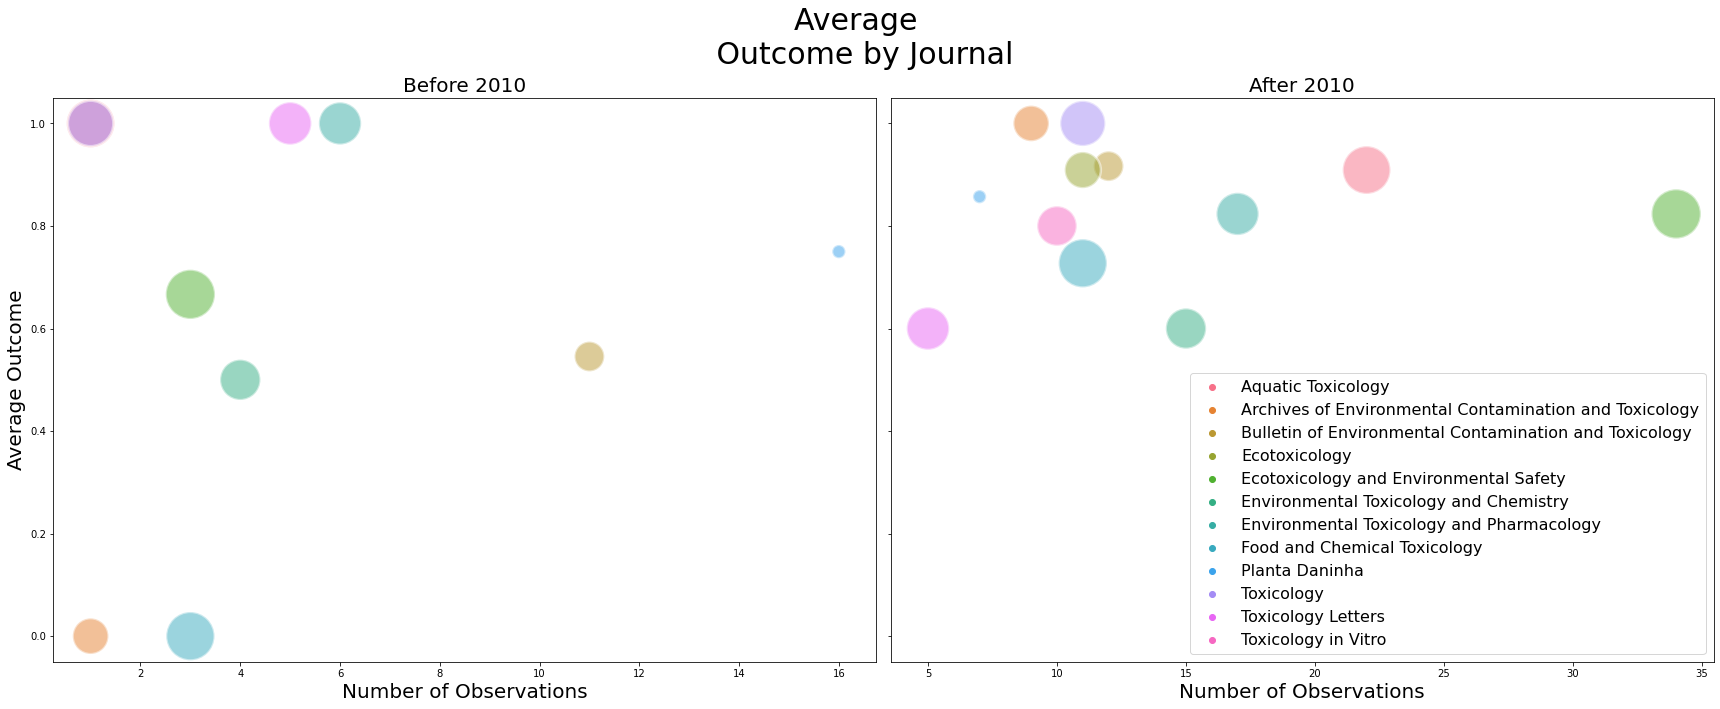

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


f, axs = plt.subplots(1,2,
                      figsize=(24,10),
                      sharey=True)
f.suptitle("Average \n Outcome by Journal", fontsize=30)


sns.scatterplot(x=outcomes_by_journal_before_2010["num_obs"],
                y=outcomes_by_journal_before_2010["General_outcome"],
                s = outcomes_by_journal_before_2010["Current Impact_Factor"]*500, 
                hue="Journal",
                alpha = .5,
                data=outcomes_by_journal,
                ax = axs[0],
                legend = False)
axs[0].set_title('Before 2010', fontsize=20)
axs[0].set_xlabel('Number of Observations', fontsize=20)
axs[0].set_ylabel('Average Outcome', fontsize=20)

sns.scatterplot(x=outcomes_by_journal_after_2010["num_obs"], 
                y=outcomes_by_journal_after_2010["General_outcome"],
                s = outcomes_by_journal_after_2010["Current Impact_Factor"]*500, 
                hue="Journal",
                alpha = .5,
                data=outcomes_by_journal,
                ax = axs[1])
axs[1].set_title('After 2010', fontsize=20)
axs[1].set_xlabel('Number of Observations', fontsize=20)
axs[1].set_ylabel('Average Outcome', fontsize=20)
plt.legend (fontsize = 16, loc = "lower right")
f.tight_layout()

In [11]:
# set view options to show entire dataframe
pd.set_option("max_rows", len(data.index))
pd.set_option("max_columns", len(data.columns))

In [12]:
# show results by country

outcomes_by_country = data.groupby("Loc_experiment").mean()[outcome_vars]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()
outcomes_by_country.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Loc_experiment,,,,,
BRAZIL,0.805825,2.315204,2.064748,35.815534,103
ARGENTINA,0.898734,3.334671,2.884190,48.000000,79
USA,0.555556,3.399444,2.786444,50.476190,63
CANADA,0.500000,3.093467,2.476400,53.800000,30
FRANCE,0.875000,4.011000,3.168208,144.458333,24
CHINA,0.863636,2.882591,2.784682,17.181818,22
POLAND,0.705882,3.566176,3.059471,23.705882,17
ITALY,0.812500,3.691250,3.397875,15.562500,16
GERMANY,0.666667,2.976267,2.889267,41.533333,15


In [13]:
countries = ["BRAZIL",
           "ARGENTINA",
           "USA",
           "CANADA",
           "FRANCE",
           "CHINA",
           "POLAND",
           "ITALY",
           "GERMANY",
           "INDIA"]

top_country_data = data[outcome_vars + ["Loc_experiment", "Year"]][data["Loc_experiment"].isin(countries)]

outcomes_by_country = top_country_data.groupby("Loc_experiment").mean()#[[outcome_vars]]
outcomes_by_country["num_obs"] = data["Loc_experiment"].value_counts()
outcomes_by_country.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,Year,num_obs
Loc_experiment,,,,,,
BRAZIL,0.805825,2.315204,2.064748,35.815534,2013.640777,103
ARGENTINA,0.898734,3.334671,2.884190,48.000000,2014.936709,79
USA,0.555556,3.399444,2.786444,50.476190,2011.904762,63
CANADA,0.500000,3.093467,2.476400,53.800000,2010.433333,30
FRANCE,0.875000,4.011000,3.168208,144.458333,2012.625000,24
CHINA,0.863636,2.882591,2.784682,17.181818,2016.409091,22
POLAND,0.705882,3.566176,3.059471,23.705882,2016.235294,17
ITALY,0.812500,3.691250,3.397875,15.562500,2018.000000,16
GERMANY,0.666667,2.976267,2.889267,41.533333,2017.600000,15


In [14]:
before_2010_data = top_country_data[top_country_data["Year"] < 2010]

country_before_2010 = before_2010_data.groupby("Loc_experiment").mean()[outcome_vars]
country_before_2010["num_obs"] = before_2010_data["Loc_experiment"].value_counts()
country_before_2010.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Loc_experiment,,,,,
BRAZIL,0.791667,1.455750,0.979833,63.291667,24
USA,0.250000,3.187100,1.603500,87.550000,20
ARGENTINA,0.800000,2.664100,1.693900,126.500000,10
CANADA,0.375000,1.810125,0.924250,97.250000,8
FRANCE,0.714286,4.975429,3.555857,317.428571,7
CHINA,1.000000,1.785000,0.634000,39.000000,1
INDIA,1.000000,0.000000,0.000000,72.000000,1
POLAND,0.000000,2.871000,1.337000,67.000000,1


In [15]:
after_2010_data = top_country_data[top_country_data["Year"] >= 2010]

country_after_2010 = after_2010_data.groupby("Loc_experiment").mean()[outcome_vars]
country_after_2010["num_obs"] = after_2010_data["Loc_experiment"].value_counts()
country_after_2010.sort_values("num_obs", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Loc_experiment,,,,,
BRAZIL,0.810127,2.576304,2.394342,27.468354,79
ARGENTINA,0.913043,3.431855,3.056696,36.455882,69
USA,0.697674,3.498209,3.336651,33.232558,43
CANADA,0.545455,3.560136,3.040818,38.000000,22
CHINA,0.857143,2.934857,2.887095,16.142857,21
FRANCE,0.941176,3.613882,3.008588,73.235294,17
ITALY,0.812500,3.691250,3.397875,15.562500,16
POLAND,0.750000,3.609625,3.167125,21.000000,16
GERMANY,0.666667,2.976267,2.889267,41.533333,15


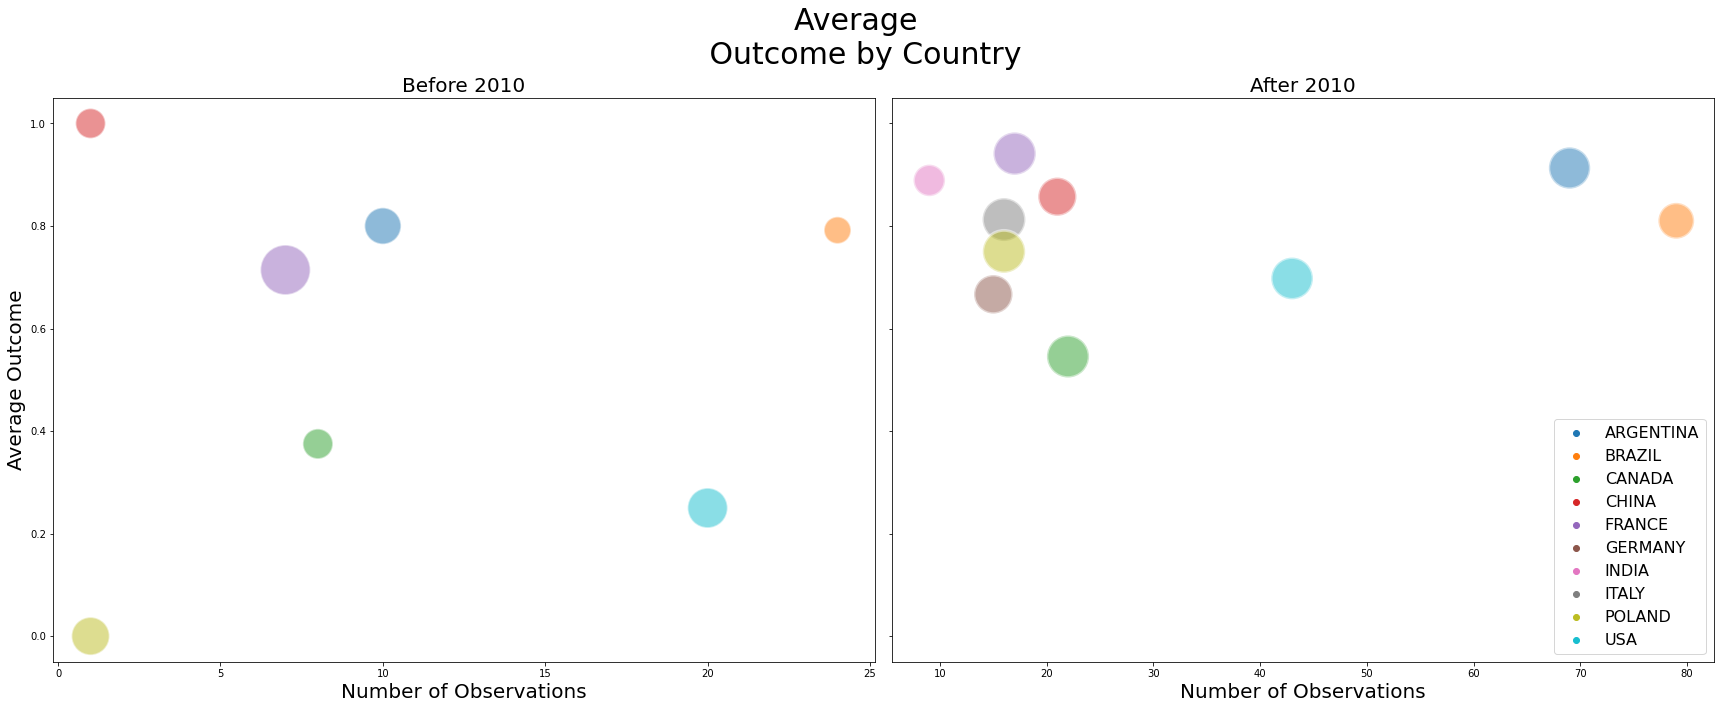

In [16]:
f, axs = plt.subplots(1,2,
                      figsize=(24,10),
                      sharey=True)
f.suptitle("Average \n Outcome by Country", fontsize=30)


sns.scatterplot(x=country_before_2010["num_obs"],
                y=country_before_2010["General_outcome"],
                s = country_before_2010["Current Impact_Factor"]*500, 
                hue="Loc_experiment",
                alpha = .5,
                data=outcomes_by_country,
                ax = axs[0],
                legend = False)

axs[0].set_title('Before 2010', fontsize=20)
axs[0].set_xlabel('Number of Observations', fontsize=20)
axs[0].set_ylabel('Average Outcome', fontsize=20)

sns.scatterplot(x=country_after_2010["num_obs"], 
                y=country_after_2010["General_outcome"],
                s = country_after_2010["Current Impact_Factor"]*500, 
                hue="Loc_experiment",
                alpha = .5,
                data=outcomes_by_country,
                ax = axs[1])

axs[1].set_title('After 2010', fontsize=20)
axs[1].set_xlabel('Number of Observations', fontsize=20)
axs[1].set_ylabel('Average Outcome', fontsize=20)

plt.legend (fontsize = 16, loc = "lower right")
f.tight_layout()

In [17]:
## Create indicator variables to represent funding source location
funding_sources = ["Public", "Private", "University", "International", "Research"]
data["Fund_Source"].fillna("", inplace = True)
data["Fund_Source"] = data["Fund_Source"].str.title()
for source in funding_sources:
    data[source] = 0
    data[source][data["Fund_Source"].str.contains(source)]=1
data[["Fund_Source"]+funding_sources]

<ipython-input-17-dba50e5d6eac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Fund_Source"].str.contains(source)]=1


,Fund_Source,Public,Private,University,International,Research
0,,0,0,0,0,0
1,Public,1,0,0,0,0
2,Public And University,1,0,1,0,0
3,Public And University,1,0,1,0,0
4,Public And University,1,0,1,0,0
5,Public,1,0,0,0,0
6,University,0,0,1,0,0
7,Public And University,1,0,1,0,0
8,Public And Private,1,1,0,0,0
9,University,0,0,1,0,0


In [18]:
### Kodjo develop this... 09232021 #####
## code for counting projects and calculating average outcome by funding source type
funding_sources = ["Public",
                   "Private",
                   "University",
                   "Research"]

for key in funding_sources:
    print(key, data[key].sum(), data[data[key] == 1]["General_outcome"].mean())


Public 306 0.7843137254901961
Private 51 0.6274509803921569
University 114 0.8070175438596491
Research 3 0.6666666666666666


Text(0.5, 1.0, 'Average Outcome by Funding Source')

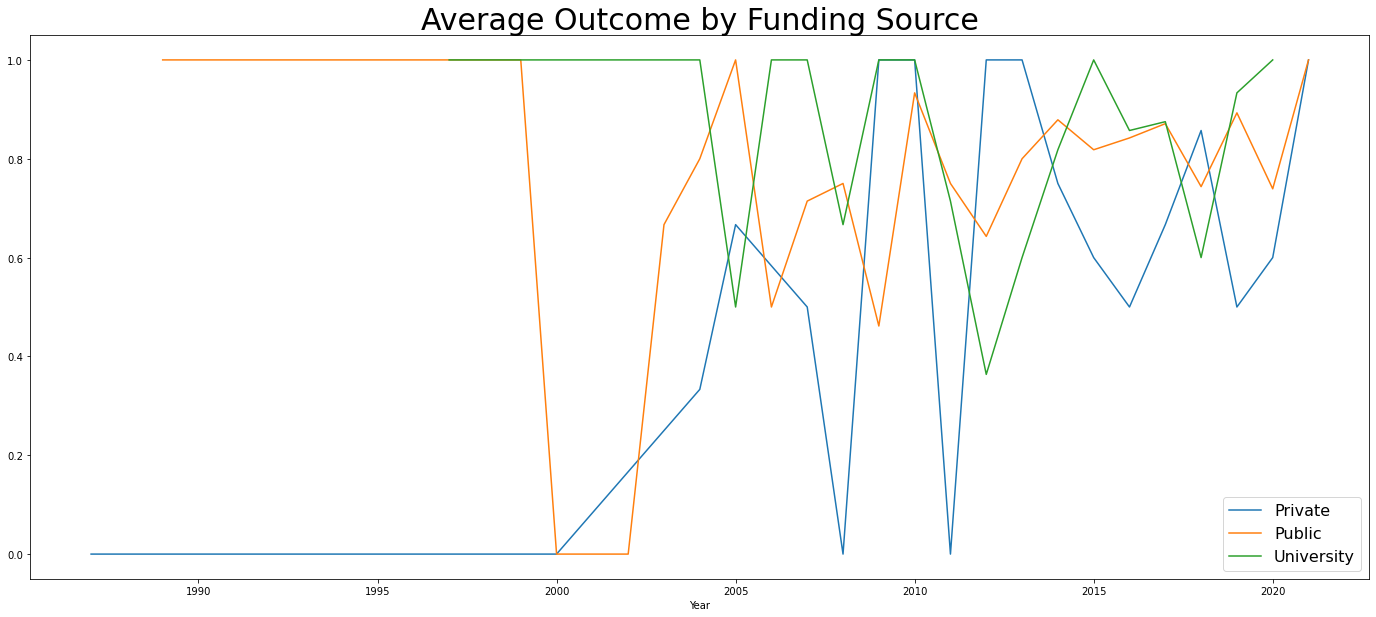

In [19]:
fig, ax = plt.subplots(figsize = (24, 10))
data[data["Private"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Private")
data[data["Public"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Public")
data[data["University"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "University")
#data[data["International"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "International")
plt.legend(fontsize = 16)
ax.set_title("Average Outcome by Funding Source", fontsize = 30)

In [20]:
## Create indicator variables to represent funding source location
Author_affiliations = [ 'Private Affiliation',
 'Public Affiliation',
 'University Affiliation']
data["Author_affiliation"].fillna("", inplace = True)
data["Author_affiliation"] = data["Author_affiliation"].str.title()
for source in Author_affiliations:
    data[source] = 0
    data[source][data["Author_affiliation"].str.contains(source)]=1
data[["Author_affiliation"]+Author_affiliations]

<ipython-input-20-ee65ca1dc4e7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Author_affiliation"].str.contains(source)]=1


,Author_affiliation,Private Affiliation,Public Affiliation,University Affiliation
0,"Hospital Italiano Rosario, Surgery, Rosario, A...",0,0,0
1,"South National University, Argentina",0,0,0
2,Universidad Nacional De Mar Del Plata & Unidad...,0,0,0
3,Instituto De Ciencias De La Tierra Y Ambiental...,0,0,0
4,"Universidad Nacional Del Litoral, Santiago Del...",0,0,0
5,"Universidad De Buenos Aires, C1121Abg Ciudad A...",0,0,0
6,"Laboratorio De Biología Y Ecotoxicología, Facu...",0,0,0
7,"Department Of Agronomy, South National Univers...",0,0,0
8,Instituto De Investigaciones Biotectonógicas D...,0,0,0
9,"Cátedra De Bioquímica Molecular, Área Química ...",0,0,0


In [21]:
Author_affiliation = ["Public", "Private", "University", "International", "Research"]
data["Institution"].fillna("", inplace = True)
data["Institution"] = data["Institution"].str.title()
for source in Author_affiliation:
    data[source] = 0
    data[source][data["Institution"].str.contains(source)]=1
data[["Institution"]+Author_affiliation]

<ipython-input-21-99174c72e075>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[source][data["Institution"].str.contains(source)]=1


,Institution,Public,Private,University,International,Research
0,Public & University,1,0,1,0,0
1,University,0,0,1,0,0
2,University,0,0,1,0,0
3,Public & University,1,0,1,0,0
4,University,0,0,1,0,0
5,University,0,0,1,0,0
6,University,0,0,1,0,0
7,Private & University,0,1,1,0,0
8,Public & University,1,0,1,0,0
9,University,0,0,1,0,0


In [22]:
Author_affiliation = ["Public",
                   "Private",
                   "University",
                   "International",
                   "Research"]

for key in Author_affiliation:
    print(key, data[key].sum(), data[data[key] == 1]["General_outcome"].mean())

Public 101 0.6534653465346535
Private 25 0.32
University 442 0.7737556561085973
International 2 0.5
Research 0 nan


Text(0.5, 1.0, 'Average Outcome by Author Affiliation')

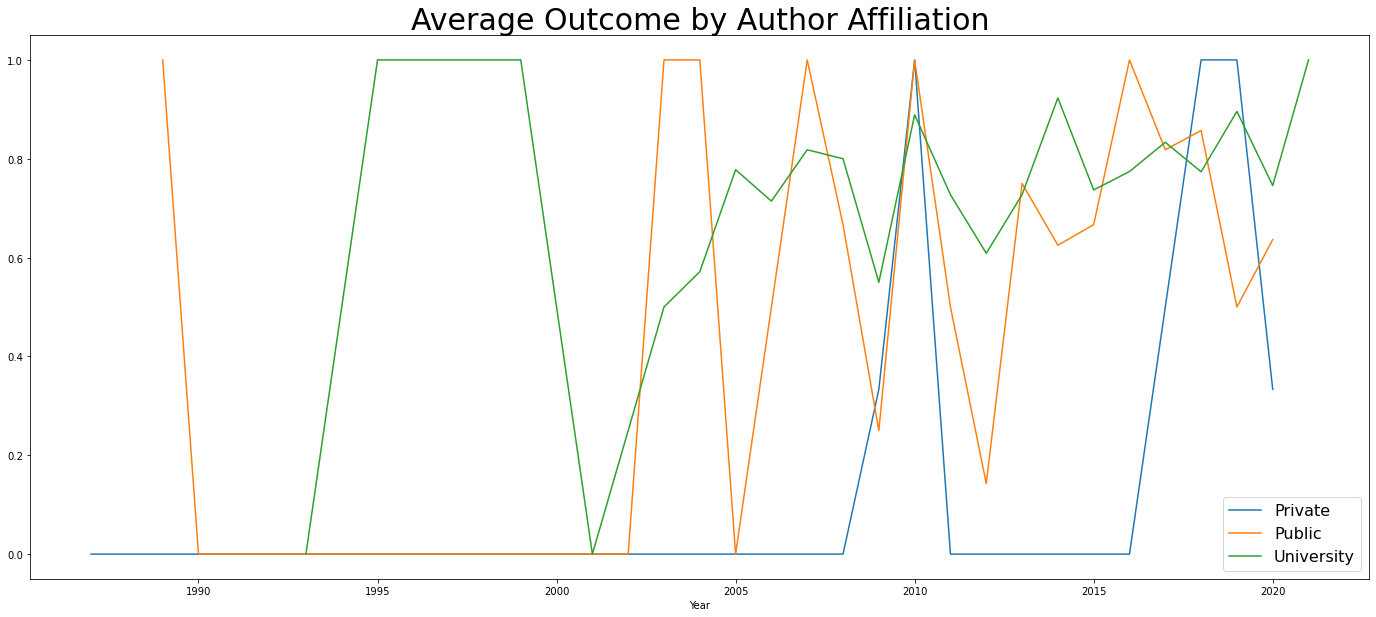

In [23]:
fig, ax = plt.subplots(figsize = (24, 10))
data[data["Private"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Private")
data[data["Public"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "Public")
data[data["University"]== 1].groupby("Year").mean()["General_outcome"].plot.line(ax = ax, label = "University")
plt.legend(fontsize = 16)
ax.set_title("Average Outcome by Author Affiliation", fontsize = 30)

In [24]:
outcome_by_journal.sort_values("Impact_F_Publishing_Year", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Journal,,,,,
Proceedings of the National Academy of Sciences,1.000000,9.387000,9.488000,105.500000,2
Water Research,0.000000,9.130000,9.130000,10.000000,1
Journal of the National Cancer Institute,1.000000,9.702000,9.012000,106.000000,1
Environment International,0.666667,7.943000,7.943000,7.000000,3
The American Journal of Clinical Nutrition,0.000000,6.853000,7.702000,32.000000,1
Critical Reviews in Toxicology,0.000000,3.812000,6.554500,55.500000,2
Science of The Total Environment,0.833333,6.551000,6.284500,32.000000,6
Msystems,1.000000,6.280000,6.280000,1.000000,1
Environmental Research,1.000000,5.715000,5.715000,3.500000,2


Text(0, 0.5, 'General Outcome')

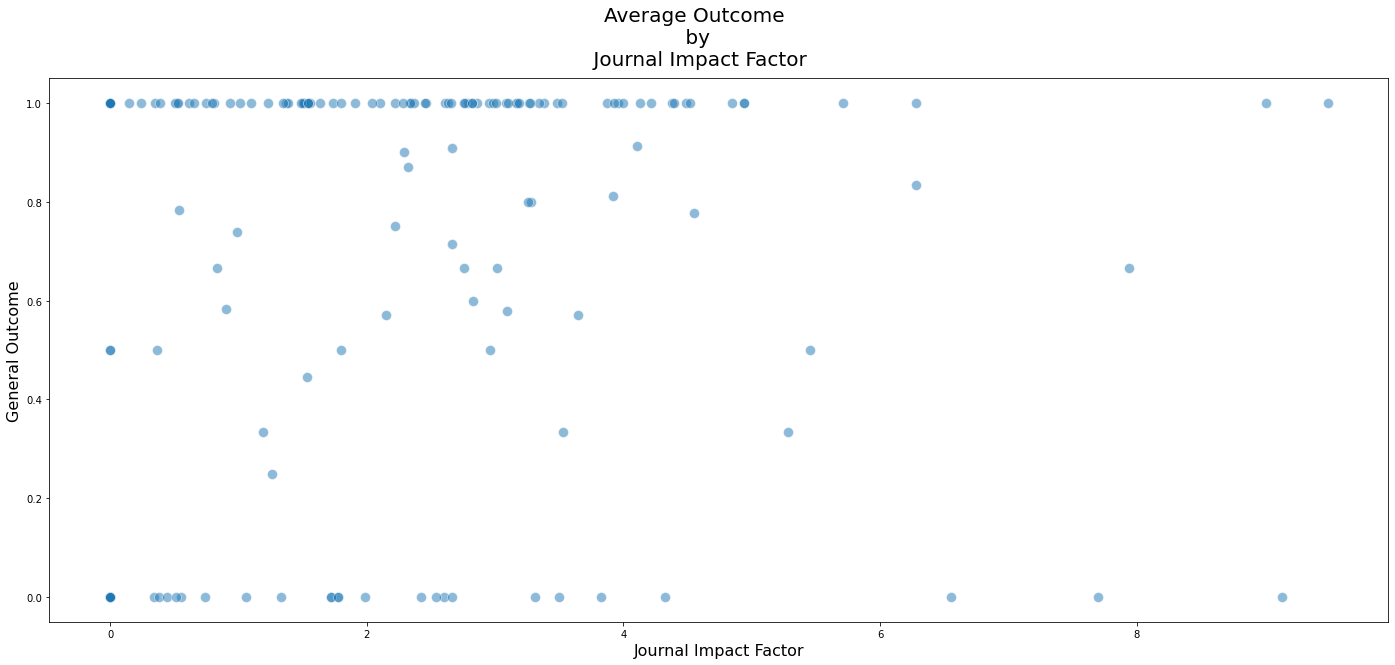

In [25]:
f, ax = plt.subplots(figsize=(24,10))
sns.scatterplot(data=outcome_by_journal, 
                x="Impact_F_Publishing_Year", 
                y="General_outcome",
                s = 100,
                alpha = .5,
                color = "C0")
f.suptitle("Average Outcome \n by \n Journal Impact Factor", fontsize=20)
ax.set_xlabel("Journal Impact Factor", fontsize=16)
ax.set_ylabel('General Outcome', fontsize=16)

In [26]:
IF_data = data[outcome_vars + ["Year"]]
IF_before_2010_data = IF_data[IF_data["Year"] < 2010]
IF_after_2010_data = IF_data[IF_data["Year"] >= 2010]

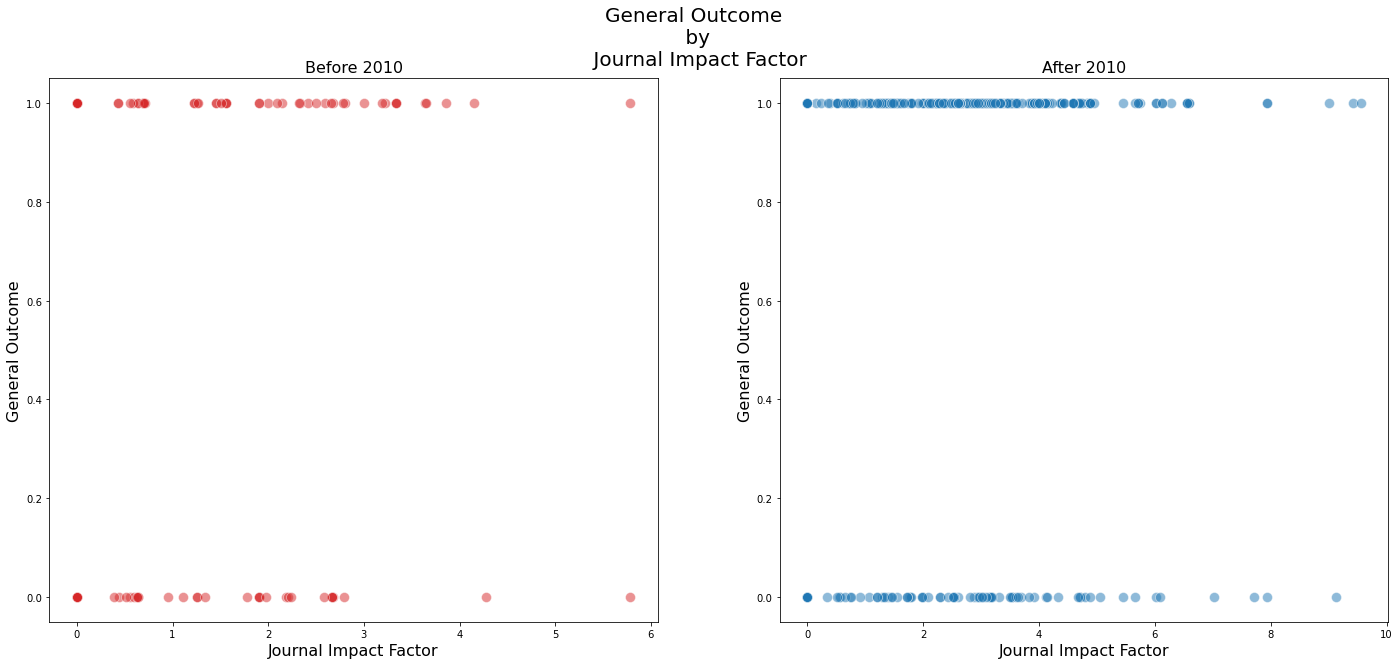

In [30]:
f, axs = plt.subplots(1, 2, figsize=(24,10))
f.suptitle("General Outcome \n by \n Journal Impact Factor", fontsize=20)

sns.scatterplot(data=outcome_by_journal, x=IF_before_2010_data["Impact_F_Publishing_Year"], 
                y=IF_before_2010_data["General_outcome"], 
                s = 100,
                alpha = .5,
                color = "C3",
               ax = axs[0])
axs[0].set_title('Before 2010', fontsize=16)
axs[0].set_xlabel("Journal Impact Factor", fontsize=16)
axs[0].set_ylabel('General Outcome', fontsize=16)

sns.scatterplot(data=outcome_by_journal, x=IF_after_2010_data["Impact_F_Publishing_Year"], 
                y=IF_after_2010_data["General_outcome"], 
                s = 100,
                alpha = .5,
                color = "C0",
               ax = axs[1])
axs[1].set_title('After 2010', fontsize=16)
axs[1].set_xlabel("Journal Impact Factor", fontsize=16)
axs[1].set_ylabel('General Outcome', fontsize=16)

plt.show()

In [28]:
outcome_by_journal.sort_values("Num_Citations", ascending = False)

,General_outcome,Current Impact_Factor,Impact_F_Publishing_Year,Num_Citations,num_obs
Journal,,,,,
Chemical research in toxicology,1.000000,3.308000,4.491000,561.500000,2
Environmental Health Perspectives,0.333333,8.326000,5.283333,432.666667,3
Applied Soil Ecology,0.000000,3.497000,2.663000,174.000000,1
Mutation Research/Genetic Toxicology,0.000000,2.665000,0.000000,128.000000,1
Toxicology,1.000000,4.100000,3.923750,115.500000,12
Journal of the National Cancer Institute,1.000000,9.702000,9.012000,106.000000,1
Proceedings of the National Academy of Sciences,1.000000,9.387000,9.488000,105.500000,2
Journal of Proteomics,1.000000,3.683000,4.215000,105.000000,1
Journal of Experimental Biology,1.000000,3.007500,2.981250,95.750000,4


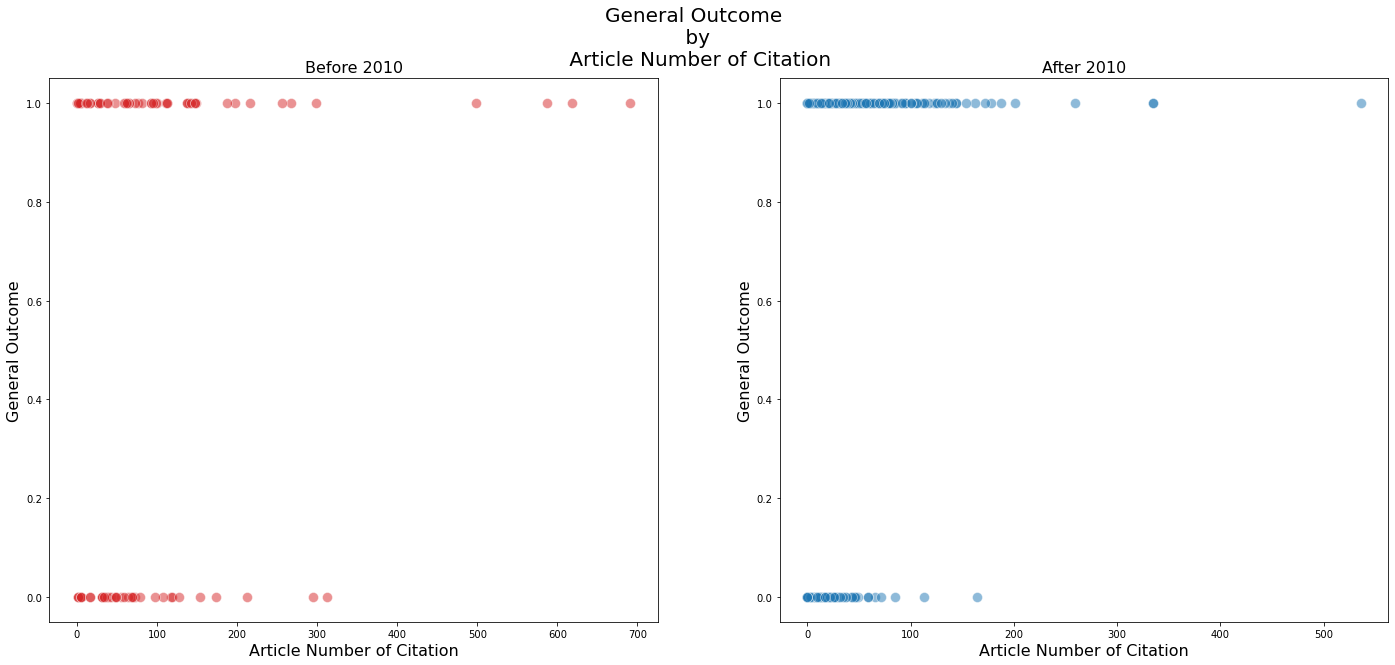

In [31]:
f, axs = plt.subplots(1, 2, figsize=(24,10))
f.suptitle("General Outcome \n by \n Article Number of Citation", fontsize=20)

sns.scatterplot(data = IF_before_2010_data, x=IF_before_2010_data["Num_Citations"], 
                y=IF_before_2010_data["General_outcome"], 
                s = 100,
                alpha = .5,
                color = "C3",
               ax = axs[0])
axs[0].set_title('Before 2010', fontsize=16)
axs[0].set_xlabel("Article Number of Citation", fontsize=16)
axs[0].set_ylabel('General Outcome', fontsize=16)

sns.scatterplot(data = IF_after_2010_data, x=IF_after_2010_data["Num_Citations"], 
                y=IF_after_2010_data["General_outcome"], 
                s = 100,
                alpha = .5,
                color = "C0",
               ax = axs[1])
axs[1].set_title('After 2010', fontsize=16)
axs[1].set_xlabel("Article Number of Citation", fontsize=16)
axs[1].set_ylabel('General Outcome', fontsize=16)


plt.show()